In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pylab import plt
import pylab 
from sklearn import cross_validation
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


In [2]:
reviews = pd.read_csv('winemag-data-130k-v2.csv')
reviews.drop(columns=['Unnamed: 0', 'province', 'region_1', 'region_2', 'taster_name', 'taster_twitter_handle'], inplace=True)
reviews = reviews[reviews['price']<100]
reviews.shape

(117024, 8)

In [3]:
reviews.head(5)

,country,description,designation,points,price,title,variety,winery
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem


Data Exploration ! todo

In [4]:
#preprocessing drop dupliated data
reviews = reviews.drop_duplicates(['title','description'])
reviews.shape

(107808, 8)

In [5]:
#scatter plot
cols_name = reviews.columns.values
reviews.describe(include='all')

,country,description,designation,points,price,title,variety,winery
count,107753,107808,76423,107808.000000,107808.000000,107808,107807,107808
unique,42,107784,34440,NaN,NaN,106895,692,15677
top,US,This wine shows some of the less appealing asp...,Reserve,NaN,NaN,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Pinot Noir,Testarossa
freq,48979,2,1769,NaN,NaN,9,11369,200
mean,NaN,NaN,NaN,88.261854,30.780369,NaN,NaN,NaN
std,NaN,NaN,NaN,3.001219,18.704204,NaN,NaN,NaN
min,NaN,NaN,NaN,80.000000,4.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,86.000000,17.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,88.000000,25.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,90.000000,40.000000,NaN,NaN,NaN


Price | points | Country | distribution? relation? ! todo

Frequent taste | quality | good | bad todo

NUERAL NEXT WORK REVIEW -> POINTS?

In [7]:
np.unique(reviews['points'], return_counts = True)

(array([ 80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
         93,  94,  95,  96,  97,  98,  99, 100], dtype=int64),
 array([  397,   692,  1836,  3025,  6480,  9530, 12600, 16933, 17207,
        12226, 15410, 11359,  9613,  6489,  3758,  1535,   523,   229,
           77,    33,    19], dtype=int64))

In [141]:
df1 = pd.DataFrame(data.groupby('country')['description'].count())

country    43
dtype: int64

In [6]:
reviews.groupby('country')['description'].count()

country
Argentina                  3406
Armenia                       2
Australia                  2059
Austria                    2512
Bosnia and Herzegovina        2
Brazil                       44
Bulgaria                    131
Canada                      223
Chile                      4088
China                         1
Croatia                      68
Cyprus                       10
Czech Republic               11
England                      59
France                    15225
Georgia                      74
Germany                    1840
Greece                      427
Hungary                     122
India                         8
Israel                      450
Italy                     14772
Lebanon                      32
Luxembourg                    5
Macedonia                    11
Mexico                       66
Moldova                      56
Morocco                      24
New Zealand                1229
Peru                         16
Portugal                   4409


In [7]:
#region & prices & points distribution
reviews_region_prices = reviews[reviews['price'] <= 100][['country', 'price']]
reviews_region_prices.head(5)

,country,price
1,Portugal,15.0
2,US,14.0
3,US,13.0
4,US,65.0
5,Spain,15.0


(array([ 4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16.,
       17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29.,
       30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42.,
       43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55.,
       56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68.,
       69., 70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81.,
       82., 83., 84., 85., 86., 87., 88., 89., 90., 92., 93., 94., 95.,
       96., 97., 98., 99.]), array([   5,   12,   29,  112,  244,  217,  797,  461,  904,  790,  998,
       1666, 1186,  790, 1957,  841, 2525,  387, 1460,  537, 1441, 2621,
        832,  488, 1763,  609, 2385,   62, 1214,  218,  604, 2070,  918,
        208, 1161,  495, 1993,   72,  926,   82,  355, 1790,  215,   91,
        930,  281, 1792,   12,  299,   51,  192, 1147,  141,   23,  230,
        113, 1145,   10,  126,   26,   89,  905,   38,   18,  110,   49,
        439,    3,   91,    

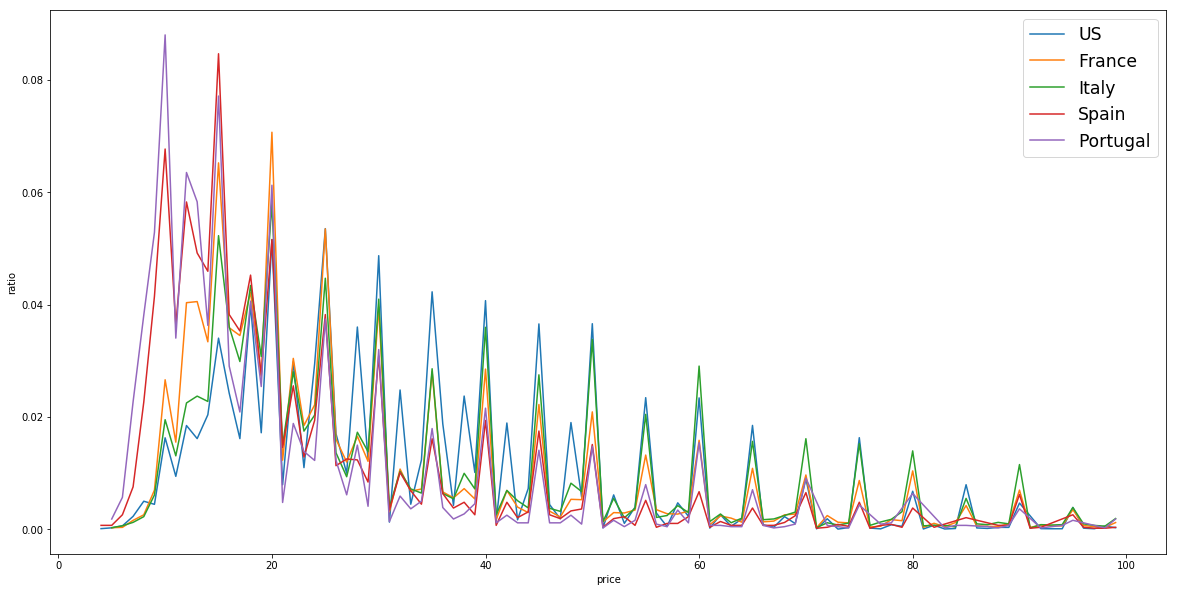

In [8]:
plt.figure(figsize=(20,10))
plt.xlabel('price')
plt.ylabel('ratio')
for country in ['US', 'France', 'Italy', 'Spain', 'Portugal']:
    prices_count = np.unique(reviews[reviews['country'] == country]['price'], return_counts=True)
    pylab.plot(prices_count[0], prices_count[1]/len(reviews[reviews['country'] == country]), label=country)
pylab.legend(loc='upper right', fontsize='xx-large')    

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


<BarContainer object of 96 artists>

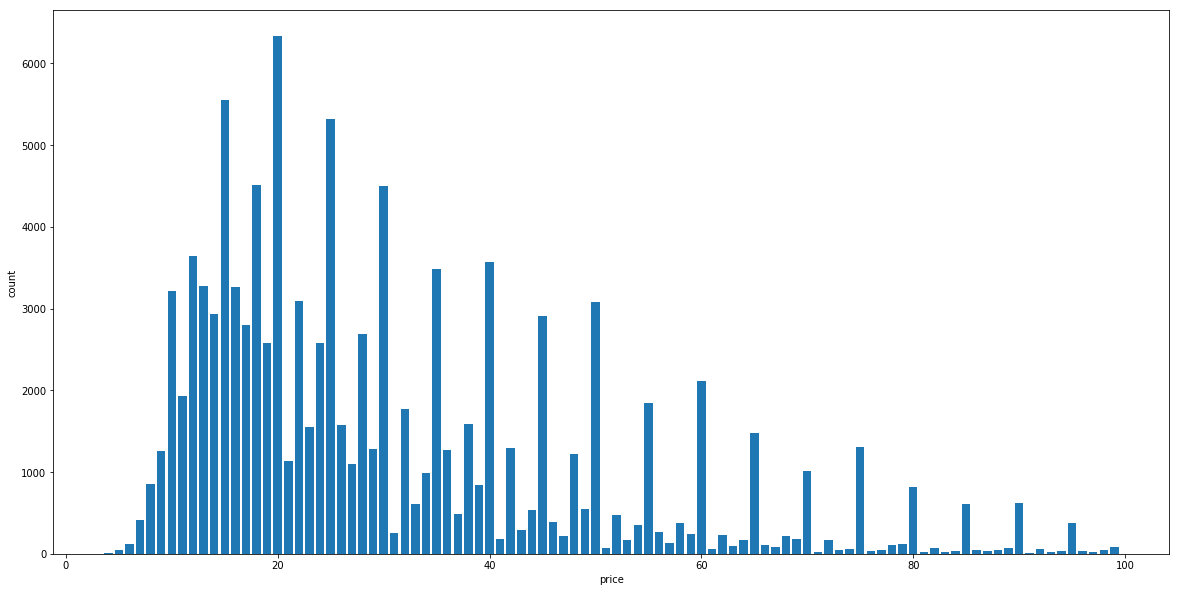

In [93]:
prices_distribution = pd.DataFrame(reviews.groupby('price')['description'].count())
prices_distribution.reset_index(inplace=True)
prices_distribution['modby5']=0
prices_distribution.ix[prices_distribution['price']%5==0, 'modby5'] = 1
prices_distribution.columns=['price', 'count','modby5']
plt.figure(figsize=(20,10))
plt.xlabel('price')
plt.ylabel('count')
plt.bar(prices_distribution['price'], prices_distribution['count'])


In [94]:
prices_distribution.corr()

,price,count,modby5
price,1.000000,-0.585251,-0.026888
count,-0.585251,1.000000,0.489738
modby5,-0.026888,0.489738,1.000000


In [47]:
reg = LinearRegression().fit(prices_distribution[['price','modby5']], prices_distribution['count'])

In [48]:
reg.score(prices_distribution[['price','modby5']], prices_distribution['count'])

0.567358499200107

In [49]:
reg.coef_

array([ -29.64001674, 1708.06897758])

In [154]:
# pass the order of your polynomial here  
poly = PolynomialFeatures(2)

x = poly.fit_transform(prices_distribution[['price','modby5']])
poly_reg=LinearRegression().fit(x, prices_distribution['count']) 
print(poly_reg.score(x[:10], prices_distribution['count'].as_matrix()[:10]))
poly_reg.coef_



-1.087738057894843


C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


array([ 0.00000000e+00, -2.78939538e+01,  1.34469374e+03,  1.96295411e-02,
       -1.94777722e+01,  1.34469374e+03])

In [153]:
poly = PolynomialFeatures(2)
x_poly_2 = poly.fit_transform(prices_distribution[['price','modby5']])
y = prices_distribution['count'].as_matrix()
ploy_2_reg = LinearRegression().fit(x_poly_2, prices_distribution['count'])
ploy_2_reg_score = linear_reg.score(x_poly_2, prices_distribution['count'])

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


ValueError: shapes (96,6) and (2,) not aligned: 6 (dim 1) != 2 (dim 0)

In [110]:
# pass the order of your polynomial here  
poly = PolynomialFeatures(3)

x = poly.fit_transform(prices_distribution[['price','modby5']])
poly_reg=LinearRegression().fit(x, prices_distribution['count']) 
print(poly_reg.score(x, prices_distribution['count']))
prpoly_reg.coef_

0.7064826265218949


array([ 0.00000000e+00,  1.13523664e+02,  3.54567936e+02, -3.55449421e+00,
        3.64967767e+01,  3.54567936e+02,  2.42469792e-02, -9.09410994e-01,
        3.64967767e+01,  3.54567936e+02])

In [157]:
kf = cross_validation.KFold(len(prices_distribution), n_folds=5, shuffle=True)
x = prices_distribution[['price','modby5']].as_matrix()
y = prices_distribution['count'].as_matrix()

poly = PolynomialFeatures(2)
x_poly_2 = poly.fit_transform(prices_distribution[['price','modby5']])
#poly = PolynomialFeatures(3)
#x_poly_3 = poly.fit_transform(prices_distribution[['price','modby5']])

for train_index, test_index in kf:
    linear_reg = LinearRegression().fit(x[train_index], y[train_index])
    linear_reg_score = linear_reg.score(x[test_index], y[test_index])
    print("linear_reg_score  " + str(linear_reg_score))
 
    ploy_2_reg = LinearRegression().fit(x_poly_2[train_index], y[train_index])
    ploy_2_reg_score = ploy_2_reg.score(x_poly_2[test_index], y[test_index])
    print("ploy_2_reg_score  " + str(ploy_2_reg_score))
    ploy_3_reg = LinearRegression().fit(x_poly_3[train_index], y[train_index])
    ploy_3_score = ploy_3_reg.score(x_poly_3[test_index], y[test_index])
    print("ploy_3_reg_score  " + str(ploy_3_score))


linear_reg_score  0.5439381021866339
ploy_2_reg_score  0.37072111328459056
ploy_3_reg_score  0.46095795292977626
linear_reg_score  0.6536122658585811
ploy_2_reg_score  0.6806051697159508
ploy_3_reg_score  0.7815613024788524
linear_reg_score  0.5922694020538416
ploy_2_reg_score  0.6453236978996681
ploy_3_reg_score  0.686894511068491
linear_reg_score  -0.1065521712676869
ploy_2_reg_score  -1.0594174733792854
ploy_3_reg_score  -0.9851001146050657
linear_reg_score  0.31106923815607657
ploy_2_reg_score  0.41635144446925
ploy_3_reg_score  0.49173541642332025


C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


ValueError: shapes (96,6) and (2,) not aligned: 6 (dim 1) != 2 (dim 0)

In [96]:
prices_distribution

,price,count,modby5
0,4.0,11,0
1,5.0,44,1
2,6.0,115,0
3,7.0,413,0
4,8.0,859,0
5,9.0,1257,0
6,10.0,3217,1
7,11.0,1926,0
8,12.0,3646,0
9,13.0,3282,0


C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[5.000e+00, 4.400e+01, 1.000e+00, 2.500e+01, 5.000e+00],
       [7.000e+00, 4.130e+02, 0.000e+00, 4.900e+01, 0.000e+00],
       [8.000e+00, 8.590e+02, 0.000e+00, 6.400e+01, 0.000e+00],
       [9.000e+00, 1.257e+03, 0.000e+00, 8.100e+01, 0.000e+00],
       [1.000e+01, 3.217e+03, 1.000e+00, 1.000e+02, 1.000e+01],
       [1.100e+01, 1.926e+03, 0.000e+00, 1.210e+02, 0.000e+00],
       [1.300e+01, 3.282e+03, 0.000e+00, 1.690e+02, 0.000e+00]])

,price,count,modby5,fake1,fake2
0,4.0,11,0,16.0,0.0
1,5.0,44,1,25.0,5.0
2,6.0,115,0,36.0,0.0
3,7.0,413,0,49.0,0.0
4,8.0,859,0,64.0,0.0
5,9.0,1257,0,81.0,0.0
6,10.0,3217,1,100.0,10.0
7,11.0,1926,0,121.0,0.0
8,12.0,3646,0,144.0,0.0
9,13.0,3282,0,169.0,0.0


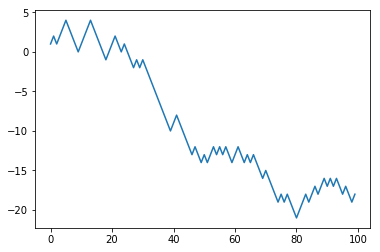

In [113]:
# RUN ALL THE CODE BEFORE YOU START
import numpy as np
 #load plot library
# indicate the output of plotting function is printed to the notebook
%matplotlib inline 


def create_random_walk():
    x = np.random.choice([-1,1],size=100, replace=True) # Sample with replacement from (-1, 1)
    return np.cumsum(x) # Return the cumulative sum of the elements
X = create_random_walk()
Y = create_random_walk()
Z = create_random_walk()

# Plotting functionality starts here
#plt.plot(X)
#plt.plot(Y)
#plt.plot(Z)

pylab.plot(a, label='aa');
pylab.show()

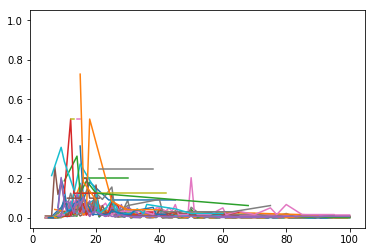

In [120]:
import numpy as np
import pylab 

for country in pd.unique(reviews_region_prices['country']):
    prices_count = np.unique(reviews_region_prices[reviews_distribution_count['country'] == country]['price'],return_counts=True)
    pylab.plot(prices_count[0], prices_count[1]/len(reviews_region_prices[reviews_distribution_count['country'] == country]), label=country)
pylab.legend(loc='upper left')
#pylab.ylim(-1.5, 2.0)
pylab.show()


In [83]:
pd.unique(reviews_region_prices['country'])

array(['Portugal', 'US', 'Spain', 'Italy', 'France', 'Germany',
       'Argentina', 'Chile', 'Australia', 'Austria', 'South Africa',
       'New Zealand', 'Israel', 'Hungary', 'Greece', 'Romania', 'Mexico',
       'Canada', nan, 'Turkey', 'Czech Republic', 'Slovenia',
       'Luxembourg', 'Croatia', 'Georgia', 'Uruguay', 'England',
       'Lebanon', 'Serbia', 'Brazil', 'Moldova', 'Morocco', 'Peru',
       'India', 'Bulgaria', 'Cyprus', 'Armenia', 'Switzerland',
       'Bosnia and Herzegovina', 'Ukraine', 'Slovakia', 'Macedonia',
       'China'], dtype=object)

In [74]:
reviews_distribution_count

,price
,unique
country,
Argentina,"[30.0, 13.0, 12.0, 22.0, 10.0, 15.0, 37.0, 14...."
Armenia,"[14.0, 15.0]"
Australia,"[18.0, 20.0, 40.0, 30.0, 12.0, 29.0, 15.0, 70...."
Austria,"[12.0, 17.0, 24.0, 23.0, 18.0, 20.0, 13.0, 16...."
Bosnia and Herzegovina,"[13.0, 12.0]"
Brazil,"[36.0, 31.0, 20.0, 10.0, 25.0, 15.0, 23.0, 26...."
Bulgaria,"[9.0, 11.0, 14.0, 22.0, 8.0, 10.0, 26.0, 16.0,..."
Canada,"[30.0, 12.0, 32.0, 38.0, 24.0, 23.0, 80.0, 20...."
